In [12]:
import torch
import torch.nn as nn

# BackPropagation with Manual model

In [49]:
def forward(X):
    return w * X

In [82]:
X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

loss = nn.MSELoss() #loss is callable function that takes actual y and y_pred
optimizer = torch.optim.SGD([w], lr = 0.01)

print(f'Prediction after training: f(5) = {forward(5):.3f}')

n_iters = 70
for epoch in range(n_iters):
    #forward pass
    y_pred = forward(X)
    
    #loss
    l = loss(Y, y_pred)
    
    l.backward() #dl/dw
    
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch %10 ==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')


Prediction after training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
Prediction after training: f(5) = 10.000


# BackPropagation with Given Linear model

In [81]:
X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)
X_tst = torch.tensor([5], dtype = torch.float32)
n_samples , n_features = X.shape

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)
loss = nn.MSELoss() #loss is callable function that takes actual y and y_pred
[w,b] = model.parameters()

optimizer = torch.optim.SGD([w], lr = 0.01)

print(f'Prediction after training: f(5) = {model(X_tst).item():.3f}')

n_iters = 100
for epoch in range(n_iters):
    #forward pass
    y_pred = model(X)
    
    #loss
    l = loss(Y, y_pred)
    
    l.backward() #dl/dw
    
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch %10 ==0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_tst).item():.3f}')


Prediction after training: f(5) = -1.629
epoch 1: w = 0.053, loss = 41.20504761
epoch 11: w = 1.653, loss = 1.60001564
epoch 21: w = 1.968, loss = 0.06494226
epoch 31: w = 2.030, loss = 0.00544364
epoch 41: w = 2.042, loss = 0.00313748
epoch 51: w = 2.044, loss = 0.00304810
epoch 61: w = 2.045, loss = 0.00304462
epoch 71: w = 2.045, loss = 0.00304450
epoch 81: w = 2.045, loss = 0.00304448
epoch 91: w = 2.045, loss = 0.00304448
Prediction after training: f(5) = 10.090


# BackPropagation with customized model

In [85]:
X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)
X_tst = torch.tensor([5], dtype = torch.float32)
n_samples , n_features = X.shape

input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        #defineLayers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)
        
loss = nn.MSELoss() #loss is callable function that takes actual y and y_pred
[w,b] = model.parameters()

optimizer = torch.optim.SGD([w], lr = 0.01)

print(f'Prediction after training: f(5) = {model(X_tst).item():.3f}')

n_iters = 100
for epoch in range(n_iters):
    #forward pass
    y_pred = model(X)
    
    #loss
    l = loss(Y, y_pred)
    
    l.backward() #dl/dw
    
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch %10 ==0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_tst).item():.3f}')


Prediction after training: f(5) = -2.685
epoch 1: w = 0.029, loss = 52.75207520
epoch 11: w = 1.837, loss = 2.15796804
epoch 21: w = 2.193, loss = 0.19696471
epoch 31: w = 2.263, loss = 0.12095674
epoch 41: w = 2.277, loss = 0.11801069
epoch 51: w = 2.280, loss = 0.11789653
epoch 61: w = 2.280, loss = 0.11789210
epoch 71: w = 2.280, loss = 0.11789192
epoch 81: w = 2.280, loss = 0.11789192
epoch 91: w = 2.280, loss = 0.11789192
Prediction after training: f(5) = 10.561


# Linear Regression Implementation 
1. Design Model (input, output size, forward pass)
2. Construct Loss and optimizer 
3. Training Loop
    - Forward pass - Compute prediction and loss
    - backward pass - gradients
    - update Weights

epoch: 100, loss = 565.9858
epoch: 200, loss = 342.6893
epoch: 300, loss = 333.0146
epoch: 400, loss = 332.5874


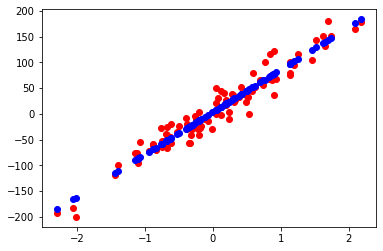

In [162]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


#0 Prepared data 

x_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features =1, noise =20, random_state = 1)
#convert to torch tensor

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

#converting y to column vector as output 

y = y.view(y.shape[0], 1) #(y.shape[0] - will get all the values from the row,  1 - mentioning the no. of columns as 1 

n_sample, n_feature = x.shape
#1. model

input_size = n_feature
output_size = 1 #we need one output for sample we put in
model  = nn.Linear(input_size, output_size)


#2. loss and optimizer
criterion = nn.MSELoss() # criterion will be. callable function
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) 


#3. Training loop 

num_epochs = 400

for epoch in range(num_epochs):
    #forword Pass
    y_pred = model(x)
    
    #loss
    loss = criterion(y_pred, y)
    
    #backward pass
    loss.backward()
    
    #updates  the Weight
    optimizer.step()
    
    #Resetting gradient 
    optimizer.zero_grad()
    
    if (epoch +1)%100  == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
#plot
predicted = model(x).detach().numpy()   # detech will help creating a new tensor with all the requires_grad as False
# then covertinh values to numpy array 

plt.plot(x_numpy, y_numpy,'ro')

plt.plot(x_numpy, predicted, 'bo')

plt.show()

In [139]:
print(model.parameters())

<generator object Module.parameters at 0x13eec9e40>


# Logistic Regression - Breast Cancer Dataset

In [175]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn  import datasets
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split


# Data Preparation
bc = datasets.load_breast_cancer()
x, y  = bc.data, bc.target

n_sample, n_features = x.shape

#splitting Data
x_train,x_test, y_train, y_test =  train_test_split(x, y , test_size = 0.2, random_state = 123)

#Standardize the data -> results data to have zero mean -> recommended for logistic data
sc = ss()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32()))
x_test = torch.from_numpy(x_test.astype(np.float32()))
y_train = torch.from_numpy(y_train.astype(np.float32()))
y_test = torch.from_numpy(y_test.astype(np.float32()))

#Reshape y_train and y_test

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

# model
# f =wx+b => for logictic regression forward is combination of weight and bias and at the end we add a sigmoid funcn

class LogisticRegression(nn.Module):
    def  __init__(self, n_input_feature):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_feature, 1) # 30 as input features and one output is required
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    

model = LogisticRegression(n_features)


#loss and optimizer

criterion = nn.BCELoss() #BinaryCrossEntrophy loss
optimizer =torch.optim.SGD(model.parameters(), lr = 0.01)

# Trining 
num_epochs =100

for epoch in range(num_epochs): 
    #forward
    y_pred = model(x_train)
    
    #loss
    loss = criterion (y_pred, y_train)
    
    #backward 
    loss.backward()
    
    #update Weights
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch +1)%10  == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
    #evalute the model
with torch.no_grad():
    y_pred_test = model(x_test)
    #convert to class level, y_pred_test > 0 is 1 elese 0
    y_pred_cls = y_pred_test.round()
    acc = y_pred_cls.eq(y_test).sum()/ float(y_test.shape[0])

    print(f'acc: {acc : .4f}')
        

epoch: 10, loss = 0.4529
epoch: 20, loss = 0.4010
epoch: 30, loss = 0.3634
epoch: 40, loss = 0.3347
epoch: 50, loss = 0.3120
epoch: 60, loss = 0.2934
epoch: 70, loss = 0.2779
epoch: 80, loss = 0.2647
epoch: 90, loss = 0.2533
epoch: 100, loss = 0.2434
acc:  0.9649
